In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the CLEAN data from step 01
df = pd.read_csv('../data/hotel_bookings_clean.csv')


#### 1. Target Variable Distribution

C:\Users\Lap Top\AppData\Local\Temp\ipykernel_11472\4060783311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='pastel')


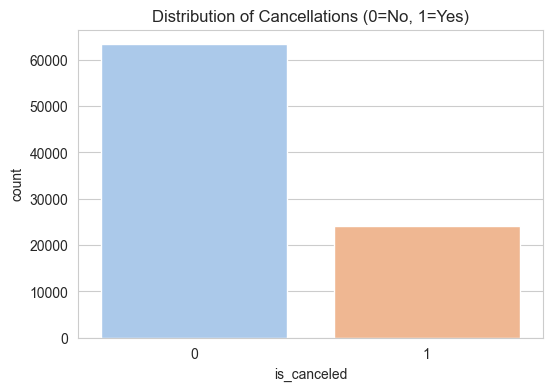

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=df, palette='pastel')
plt.title("Distribution of Cancellations (0=No, 1=Yes)")
plt.show()

#### 2. Monthly Trends
We need to sort months correctly

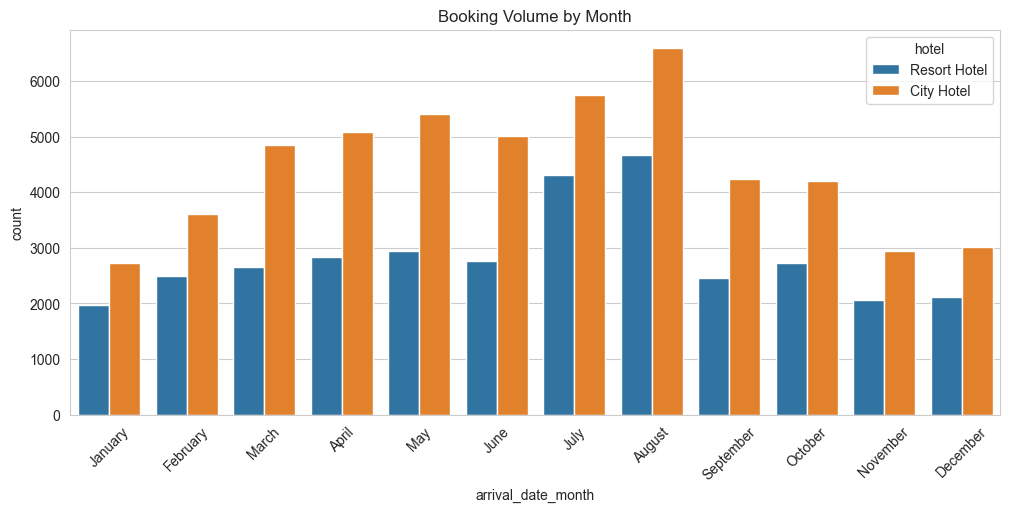

In [18]:
# 2. Monthly Trends
# We need to sort months correctly
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months_order, ordered=True)

plt.figure(figsize=(12, 5))
sns.countplot(x='arrival_date_month', hue='hotel', data=df)
plt.xticks(rotation=45)
plt.title("Booking Volume by Month")
plt.show()


#### 3. Lead Time Analysis (Histogram)

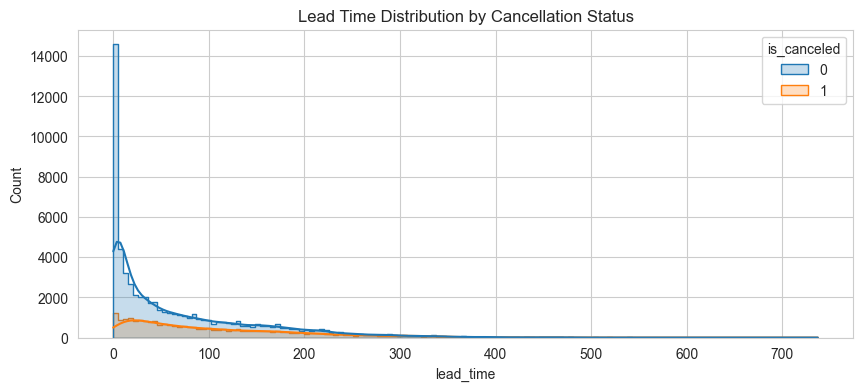

In [19]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='lead_time', hue='is_canceled', kde=True, element="step")
plt.title("Lead Time Distribution by Cancellation Status")
plt.show()

#### 4. Market Segment Analysis

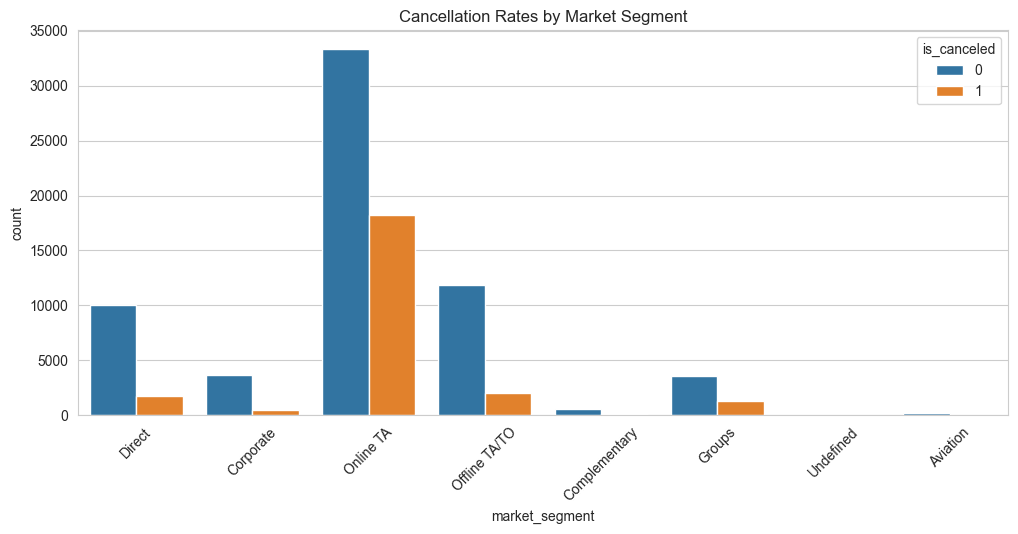

In [20]:
plt.figure(figsize=(12, 5))
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.xticks(rotation=45)
plt.title("Cancellation Rates by Market Segment")
plt.show()

#### 5. Correlation Matrix (Numerical Features)

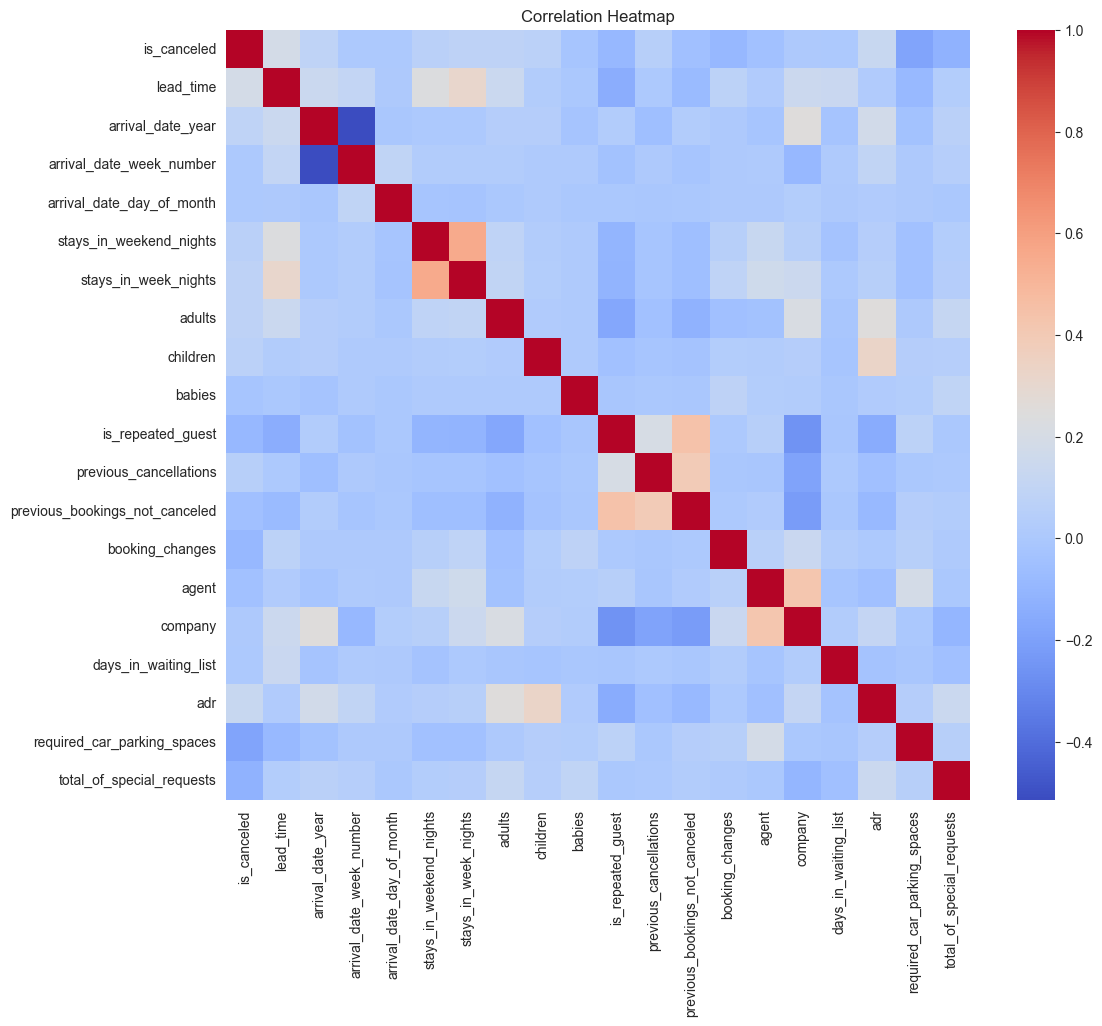

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

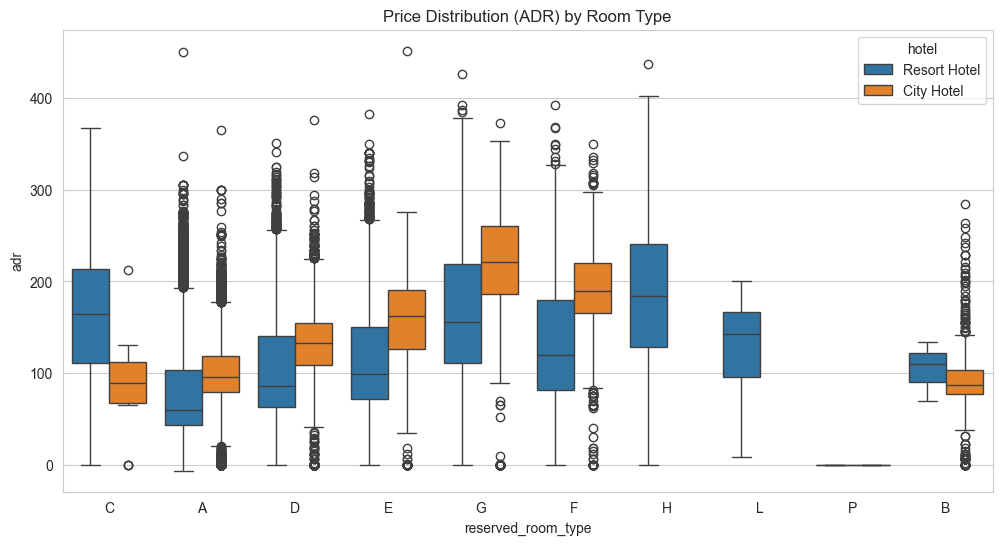

In [22]:
# 6. Price (ADR) vs Room Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=df[df['adr'] < 500]) # Filter extreme outliers
plt.title("Price Distribution (ADR) by Room Type")
plt.show()

#### 7. Deposit Type Impact
 High Predictor

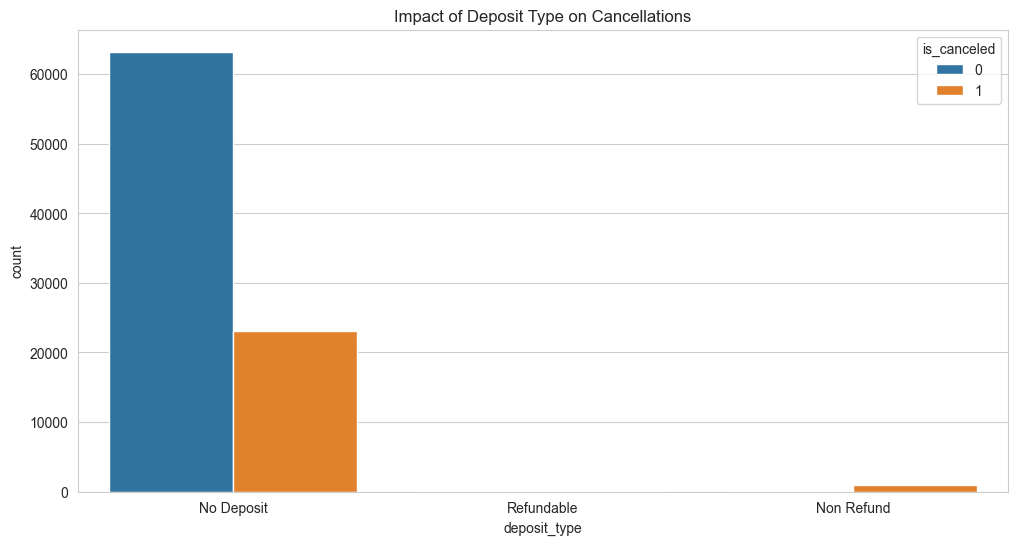

In [23]:
# 7. Deposit Type Impact
sns.countplot(x='deposit_type', hue='is_canceled', data=df)
plt.title("Impact of Deposit Type on Cancellations")
plt.show()


#### 8. Special Requests
Hypothesis: More requests = Less cancellations

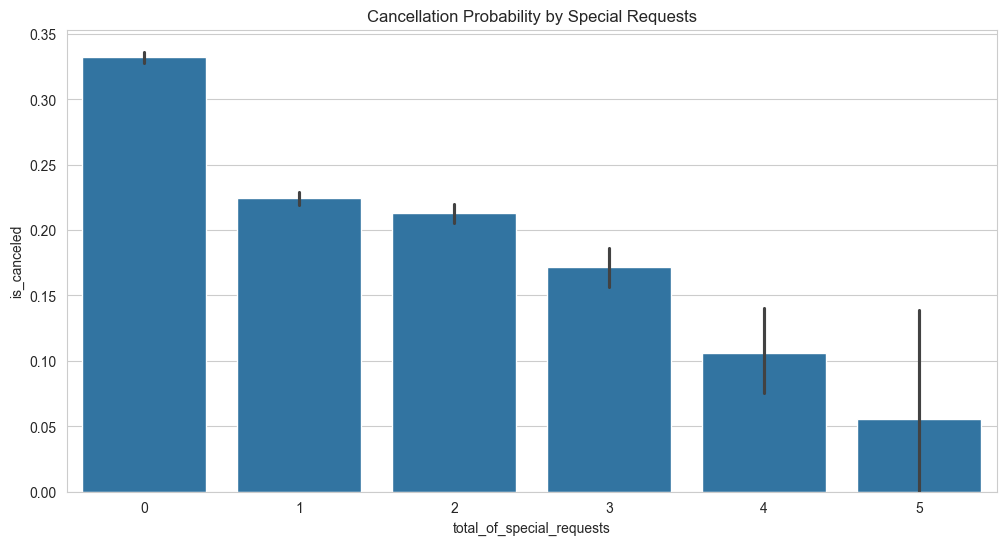

In [24]:
sns.barplot(x='total_of_special_requests', y='is_canceled', data=df)
plt.title("Cancellation Probability by Special Requests")
plt.show()